In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
bankdata = pd.read_csv('bank_target_marketing_data.csv')

In [3]:
print("Data type: ", type(bankdata))
print("Data dims: ", bankdata.shape)
bankdata.head()

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (56373, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


# Check for null value

In [5]:
check = bankdata.isnull().values.any()
print(check)
nullcol = pd.isnull(bankdata)
nullnum = nullcol.sum()
print("Count of missing values in the data:")
print(nullnum)

False
Count of missing values in the data:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Hence, there are no null values in the dataset that have to be eliminated

# Check if there is a conflict between pdays and previous

In [6]:
a = bankdata[(bankdata['pdays'] == -1) & (bankdata['previous'] != 0)]
print(a)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []


# Check for useless column

In [7]:
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000
mean,40.994767,1395.193249,15.777039,280.701861,2.713267,42.402107,0.630266
std,10.887854,3082.058457,8.342159,281.253563,3.028980,101.990991,2.303356
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,81.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,192.000000,2.000000,-1.000000,0.000000
75%,49.000000,1489.000000,21.000000,346.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
catcols = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
print("Categorical column")
for col in catcols:
    print(col,":", len(bankdata[col].unique()))

Categorical column
job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
poutcome : 4
deposit : 2


All numerical columns have different values and all categorical columns have at least 2 levels. Hence, all columns are relevant.

# Check for duplicated rows

In [9]:
before = len(bankdata)
print("Number of rows before removing: ", before)
duplicates = bankdata.duplicated()
duplicates

Number of rows before removing:  56373


0        False
1        False
2        False
3        False
4        False
         ...  
56368     True
56369     True
56370     True
56371    False
56372    False
Length: 56373, dtype: bool

In [10]:
bankdata.drop_duplicates(inplace=True)
after = len(bankdata)
print("Number of rows after removing: ", after)
bankdata

Number of rows after removing:  45211


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56356,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
56360,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
56361,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
56371,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
print("Number of duplicated rows: ", before-after)

Number of duplicated rows:  11162


In [12]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


There are 11162 of duplicated rows being removed

# Check for outliers

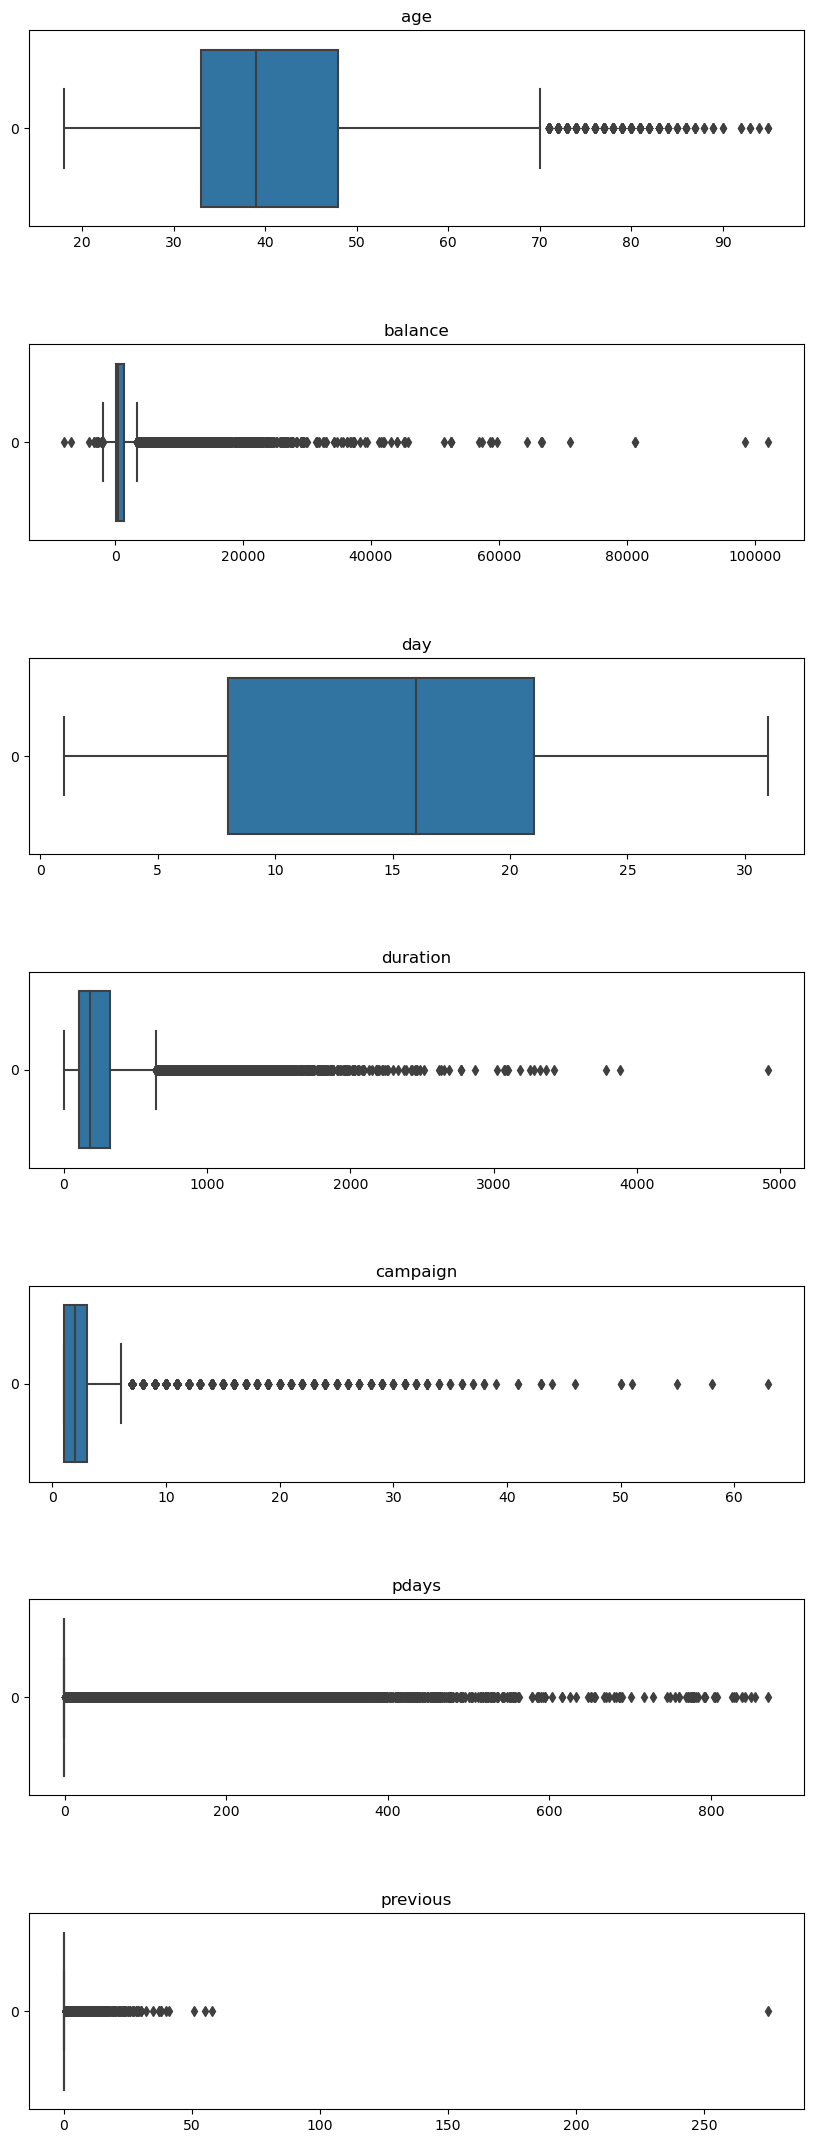

In [13]:
numcols = pd.DataFrame(bankdata[['age','balance','day','duration','campaign','pdays','previous']])
f, axes = plt.subplots(7, 1, figsize=(10,27))
count=0
for var in numcols:
    sb.boxplot(data=numcols[var], orient="h", ax=axes[count])
    axes[count].set_title(var)
    count+=1
plt.subplots_adjust(hspace=0.6)

age : remove values greater than 100 or smaller than 18   
duration : remove values smaller than 0  
previous : remove values greater than 100

In [14]:
# Eliminate rows with age > 100 and age < 18

print('Size of the dataset before eliminate the rows of age : ', bankdata.shape)
bankdata = bankdata[(bankdata['age']<=100) & (bankdata['age'] >= 18)]
print('Size of the datase after eliminate the rows of age : ', bankdata.shape)

Size of the dataset before eliminate the rows of age :  (45211, 17)
Size of the datase after eliminate the rows of age :  (45211, 17)


In [15]:
# Eliminate rows with duration < 0

print('Size of the dataset before eliminate the rows of duration: ', bankdata.shape)
bankdata = bankdata[bankdata['duration']>0] 
print('Size of the dataset after eliminate the rows of duration: ', bankdata.shape)

Size of the dataset before eliminate the rows of duration:  (45211, 17)
Size of the dataset after eliminate the rows of duration:  (45208, 17)


In [16]:
# Eliminate the rows with previous > 100

print('Size of the dataset before eliminate the rows of previous: ', bankdata.shape)
bankdata = bankdata[bankdata['previous']<=100] 
print('Size of the dataset after eliminate the rows of previous: ', bankdata.shape)

Size of the dataset before eliminate the rows of previous:  (45208, 17)
Size of the dataset after eliminate the rows of previous:  (45207, 17)


# Fixed Typo

In [17]:
bankdata['job'] = bankdata['job'].str.replace('admin.', 'administrative', regex = False)
print(bankdata['job'].unique())

['administrative' 'technician' 'services' 'management' 'retired'
 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown'
 'self-employed' 'student']


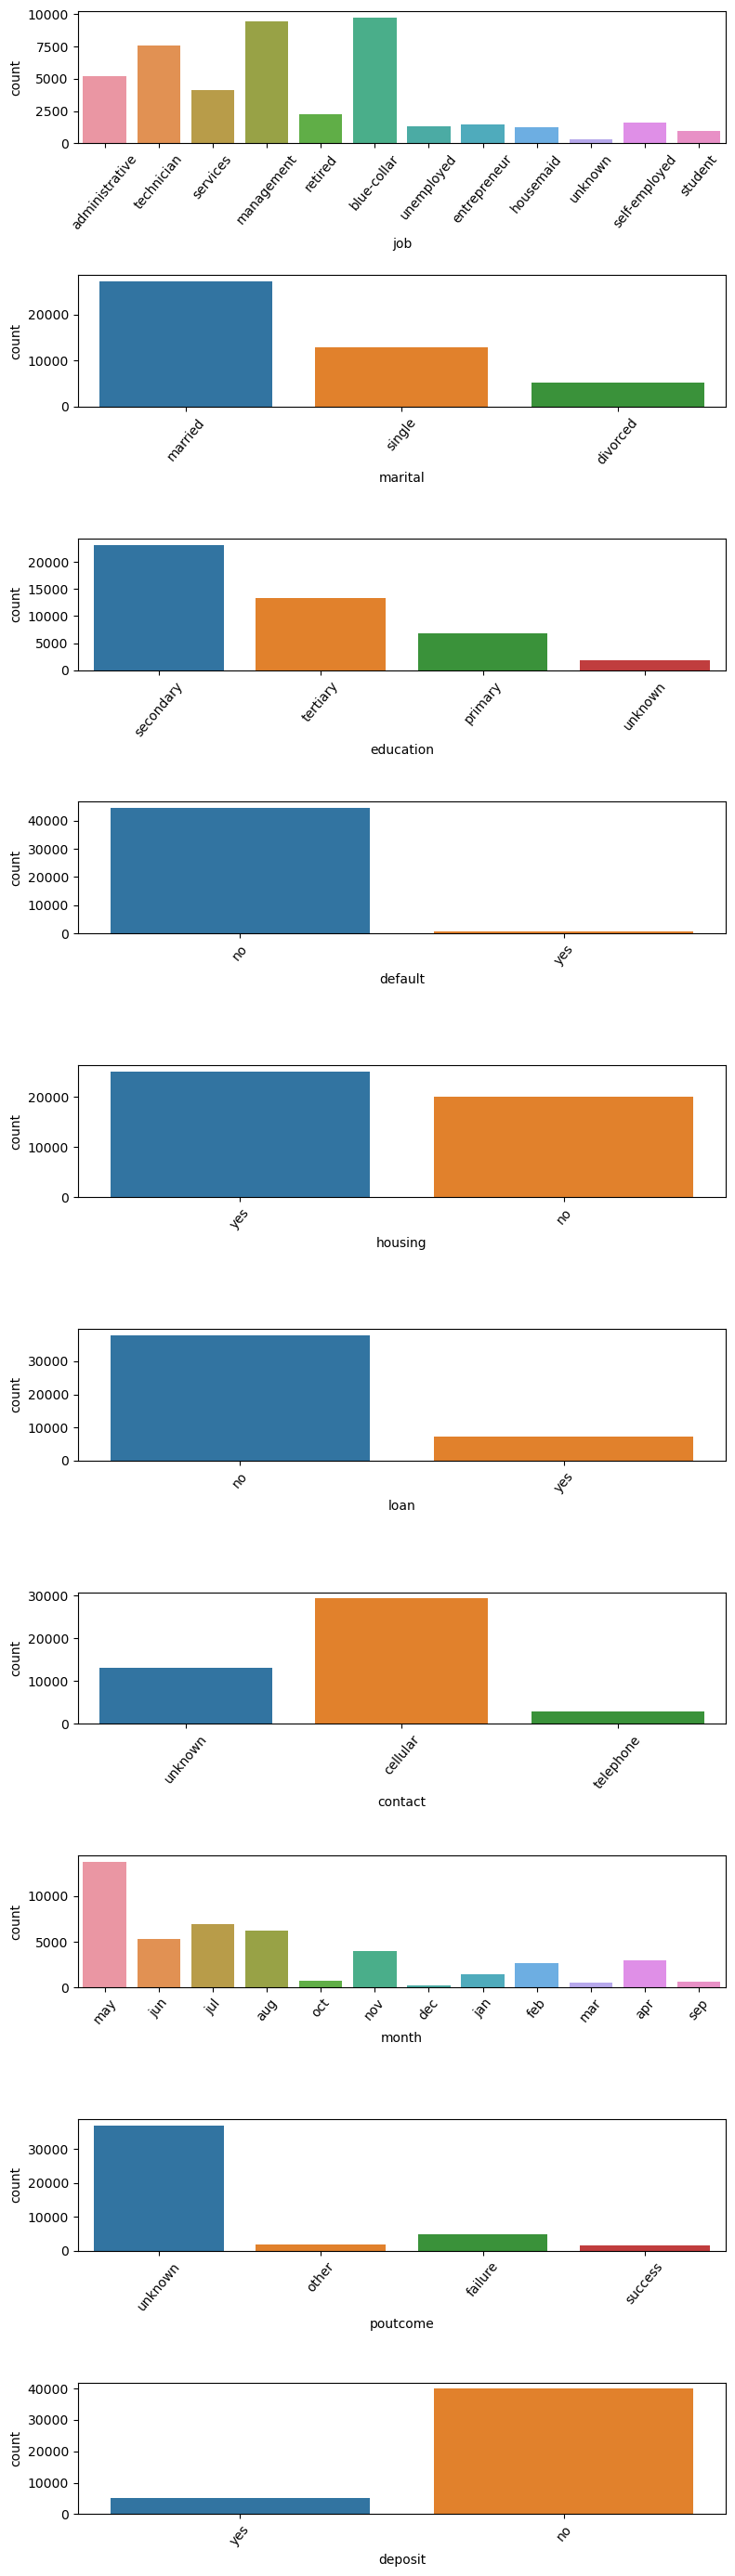

In [18]:
f, axes = plt.subplots(10, 1, figsize=(9,35))
count=0
for var in catcols:
    sb.countplot(x=var, data=bankdata, ax=axes[count])
    axes[count].set_xticklabels(axes[count].get_xticklabels(),rotation=50)
    count+=1
plt.subplots_adjust(hspace=1.0)

# Export Cleaned CSV

In [19]:
bankdata.to_csv("cleaned_bank_marketing_data.csv", index=False)